In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitudes and longtitudes combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longtitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longtitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather date.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i,  city in enumerate(cities):

    # Group cities in sets of  for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve.data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data. 
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lon": city_lon,
                          "Max Temp": city_max_temp,
                          "HUmidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 13 | ornskoldsvik
Processing Record 3 of Set 13 | qaanaaq
Processing Record 4 of Set 13 | fortuna
Processing Record 5 of Set 13 | katsuura
Processing Record 6 of Set 13 | toktogul
Processing Record 7 of Set 13 | port alfred
Processing Record 8 of Set 13 | vardo
Processing Record 9 of Set 13 | hermanus
Processing Record 10 of Set 13 | mahebourg
Processing Record 11 of Set 13 | klaksvik
Processing Record 12 of Set 13 | cape town
Processing Record 13 of Set 13 | hvide sande
Processing Record 14 of Set 13 | kholtoson
Processing Record 15 of Set 13 | voznesenye
Processing Record 16 of Set 13 | sitka
Processing Record 17 of Set 13 | puerto escondido
Processing Record 18 of Set 13 | hohhot
Processing Record 19 of Set 13 | mahadday weyne
City not found. Skipping...
Processing Record 20 of Set 13 | geraldton
Processing Record 21 of S

Processing Record 30 of Set 16 | hualmay
Processing Record 31 of Set 16 | sabang
Processing Record 32 of Set 16 | iqaluit
Processing Record 33 of Set 16 | tuatapere
Processing Record 34 of Set 16 | methala
Processing Record 35 of Set 16 | itum-kale
Processing Record 36 of Set 16 | sisimiut
Processing Record 37 of Set 16 | port lincoln
Processing Record 38 of Set 16 | tura
Processing Record 39 of Set 16 | vostok
Processing Record 40 of Set 16 | mogapinyana
Processing Record 41 of Set 16 | arlit
Processing Record 42 of Set 16 | kaeo
Processing Record 43 of Set 16 | poum
Processing Record 44 of Set 16 | mar del plata
Processing Record 45 of Set 16 | villa bruzual
Processing Record 46 of Set 16 | salme
Processing Record 47 of Set 16 | sao filipe
Processing Record 48 of Set 16 | nisia floresta
Processing Record 49 of Set 16 | bredasdorp
Processing Record 50 of Set 16 | cam pha
City not found. Skipping...
Processing Record 1 of Set 17 | tazovskiy
Processing Record 2 of Set 17 | namerikawa
Pr

Processing Record 17 of Set 20 | westerland
Processing Record 18 of Set 20 | san jose
Processing Record 19 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 20 | manggar
Processing Record 21 of Set 20 | port-cartier
Processing Record 22 of Set 20 | reyes
Processing Record 23 of Set 20 | henzada
City not found. Skipping...
Processing Record 24 of Set 20 | quatre cocos
Processing Record 25 of Set 20 | grand river south east
City not found. Skipping...
Processing Record 26 of Set 20 | senneterre
Processing Record 27 of Set 20 | gornopravdinsk
Processing Record 28 of Set 20 | lovozero
Processing Record 29 of Set 20 | lewistown
Processing Record 30 of Set 20 | faanui
Processing Record 31 of Set 20 | guadalajara
Processing Record 32 of Set 20 | walvis bay
Processing Record 33 of Set 20 | uyuni
Processing Record 34 of Set 20 | voh
Processing Record 35 of Set 20 | christchurch
Processing Record 36 of Set 20 | bjerkvik
Processing Record 37 of Set 20 | anaconda
Proc

Processing Record 49 of Set 23 | cascais
Processing Record 50 of Set 23 | del rio
Processing Record 1 of Set 24 | magadan
Processing Record 2 of Set 24 | pangnirtung
Processing Record 3 of Set 24 | humberto de campos
Processing Record 4 of Set 24 | brigantine
Processing Record 5 of Set 24 | severo-kurilsk
Processing Record 6 of Set 24 | sumbawa
City not found. Skipping...
Processing Record 7 of Set 24 | chitral
Processing Record 8 of Set 24 | shoranur
Processing Record 9 of Set 24 | kruisfontein
Processing Record 10 of Set 24 | kishanganj
Processing Record 11 of Set 24 | narnaul
Processing Record 12 of Set 24 | vestmannaeyjar
Processing Record 13 of Set 24 | sandy bay
Processing Record 14 of Set 24 | barranca
Processing Record 15 of Set 24 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 24 | nakamura
Processing Record 17 of Set 24 | adrar
Processing Record 18 of Set 24 | kieta
Processing Record 19 of Set 24 | masunga
Processing Record 20 of Set 24 | san policarpo
Pro

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lon,Max Temp,HUmidity,Cloudiness,Wind Speed,Country,Date
0,Ornskoldsvik,63.2909,18.7153,28.40,100,100,3.44,SE,2021-04-21 02:03:56
1,Qaanaaq,77.4840,-69.3632,0.61,69,99,7.20,GL,2021-04-21 02:03:27
2,Fortuna,40.5982,-124.1573,51.01,93,90,13.80,US,2021-04-21 02:03:26
3,Katsuura,35.1333,140.3000,73.00,59,0,13.80,JP,2021-04-21 02:03:57
4,Toktogul,41.8708,72.9402,47.35,95,100,1.79,KG,2021-04-21 02:03:57
5,Port Alfred,-33.5906,26.8910,65.53,82,28,12.62,ZA,2021-04-21 02:03:23
6,Vardo,70.3705,31.1107,39.54,87,99,21.97,NO,2021-04-21 02:03:58
7,Hermanus,-34.4187,19.2345,60.01,91,100,5.01,ZA,2021-04-21 02:03:11
8,Mahebourg,-20.4081,57.7000,78.80,83,75,6.91,MU,2021-04-21 02:03:59
9,Klaksvik,62.2266,-6.5890,33.80,80,40,1.14,FO,2021-04-21 02:03:59


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lon", "Max Temp", "HUmidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lon,Max Temp,HUmidity,Cloudiness,Wind Speed
0,Ornskoldsvik,SE,2021-04-21 02:03:56,63.2909,18.7153,28.40,100,100,3.44
1,Qaanaaq,GL,2021-04-21 02:03:27,77.4840,-69.3632,0.61,69,99,7.20
2,Fortuna,US,2021-04-21 02:03:26,40.5982,-124.1573,51.01,93,90,13.80
3,Katsuura,JP,2021-04-21 02:03:57,35.1333,140.3000,73.00,59,0,13.80
4,Toktogul,KG,2021-04-21 02:03:57,41.8708,72.9402,47.35,95,100,1.79
5,Port Alfred,ZA,2021-04-21 02:03:23,-33.5906,26.8910,65.53,82,28,12.62
6,Vardo,NO,2021-04-21 02:03:58,70.3705,31.1107,39.54,87,99,21.97
7,Hermanus,ZA,2021-04-21 02:03:11,-34.4187,19.2345,60.01,91,100,5.01
8,Mahebourg,MU,2021-04-21 02:03:59,-20.4081,57.7000,78.80,83,75,6.91
9,Klaksvik,FO,2021-04-21 02:03:59,62.2266,-6.5890,33.80,80,40,1.14


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["HUmidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

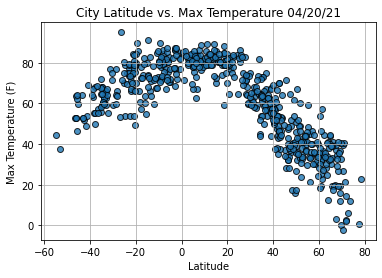

In [18]:
# Import time module
import time

# Build the scatter ploe for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# SAve the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

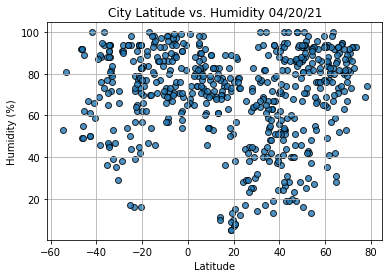

In [19]:
# Build the scatter ploe for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# SAve the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

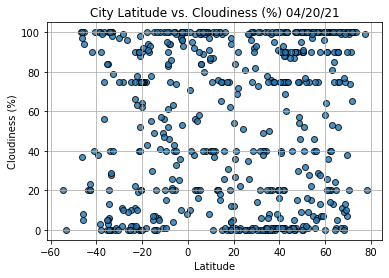

In [20]:
# Build the scatter ploe for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# SAve the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter ploe for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind  (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# SAve the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()